In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
data = pd.read_csv(r'train_v9rqX0R.csv')
test = pd.read_csv(r'test_AbJTz2l.csv')

In [3]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

Analysing Describe
1. Average is changing, will need scaling in modeling
2. 75% of outlet sales is less than 3101
3. 75% of items MRP is less than 185
4. Data is ranged from 1985-2009, where 75% of data is less than 2004, 25% of data is between 2004-09

In [5]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

## EDA

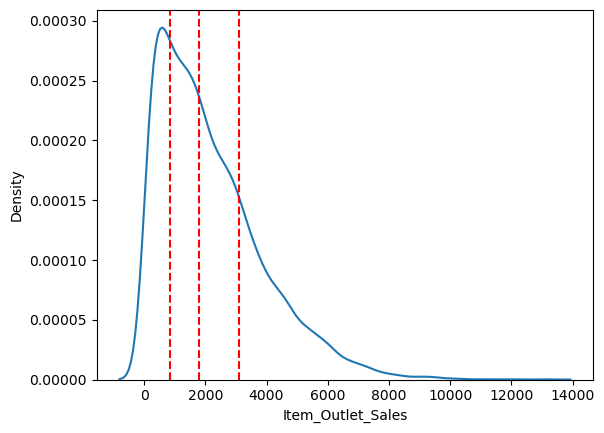

In [7]:
sns.kdeplot(data['Item_Outlet_Sales'])
# Add quantile lines
quantiles = np.percentile(data['Item_Outlet_Sales'], [25, 50, 75])
for q in quantiles:
    plt.axvline(q, color='red', linestyle='--', label=f'Quantile: {q:.2f}')

1. Distribution is heavily right-skewed. Large number of outlets has lower sales, and smaller number of outlets has very high sales
2. Most of outlet sales are between 0-1000.


In [9]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [10]:
data['Item_Type'].nunique()

16

In [11]:
#Preprocessing Item_Fat_Content
data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
data['Item_Fat_Content'].replace(['reg'],'Regular',inplace=True)


C:\Users\Abhinav\AppData\Local\Temp\ipykernel_1756\2442880908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)


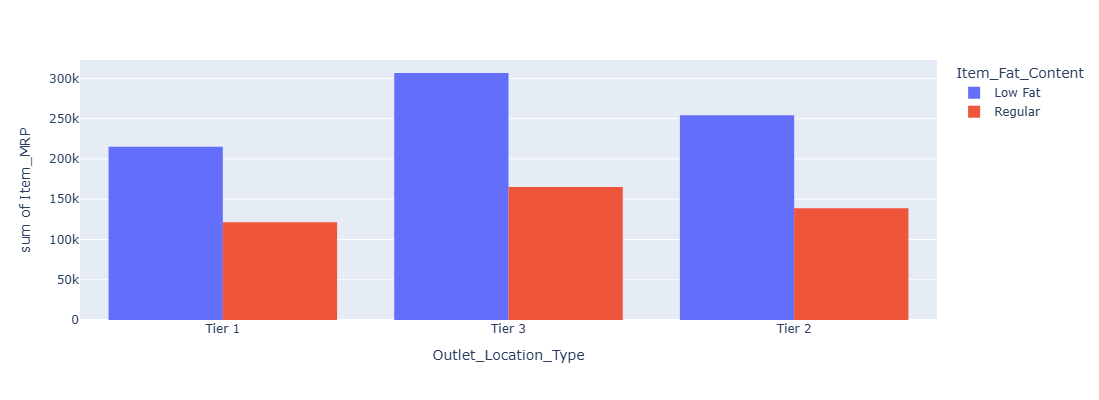

In [12]:
fig = px.histogram(data, x="Outlet_Location_Type", y="Item_MRP",
             color='Item_Fat_Content', barmode='group',
             height=400)
fig.show()

1. Tier 1 Cities has least Low fat content consumed, compare to Regular
2. Tier 3 has highest Regular fat consumption

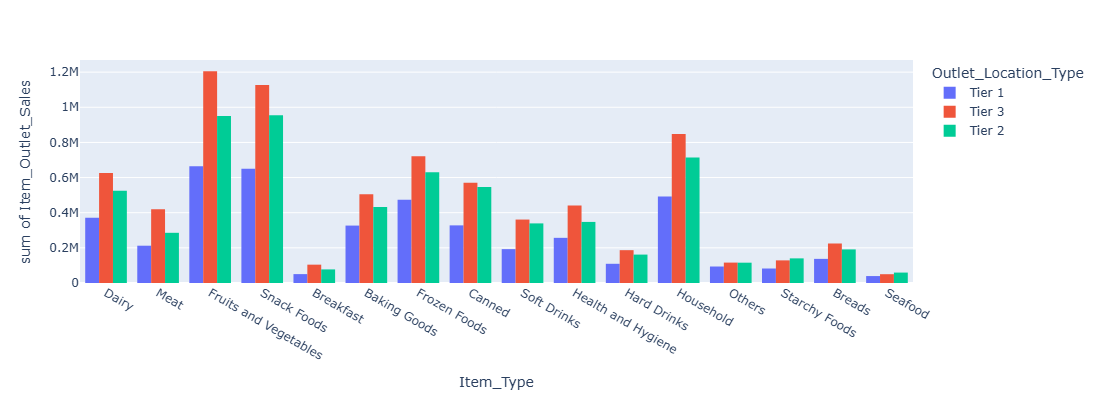

In [18]:
fig = px.histogram(data, x="Item_Type", y="Item_Outlet_Sales",
             color='Outlet_Location_Type', barmode='group',
             height=400)
fig.show()

1. Tier 1 city overall has less item sales compared to tier 2 and 3
2. Breakfast and seafood as least sold items
3. Fruits, snackfoods and household are most sold items
4. Tier 3 city has more item sales across all item types

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

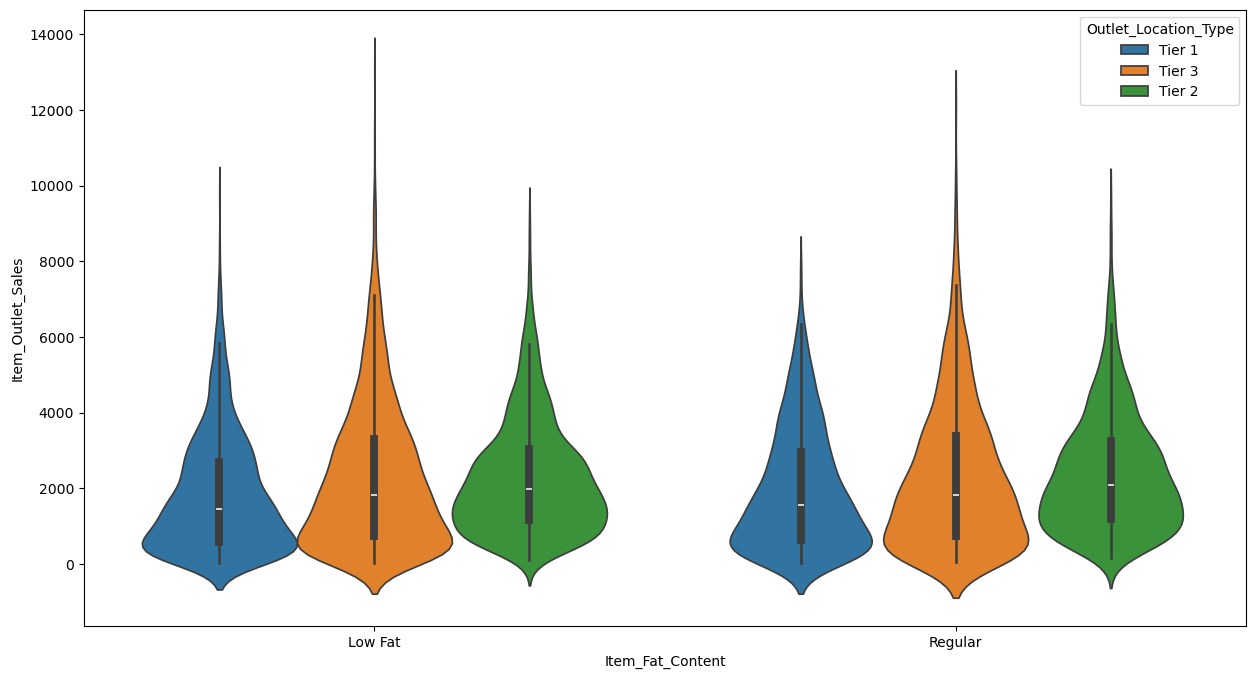

In [24]:
plt.figure(figsize=(15,8))
sns.violinplot(data=data, x="Item_Fat_Content", y="Item_Outlet_Sales", hue="Outlet_Location_Type")

1. Tier 1 outlets show highers sales for 'Low Fat' items. Tier 3 outlets seems to have a distribution skewed towards higher sales compared to Tier 2 and 1
2. Tier 2 outlets often have lower sales in low Fat content, but higher than Tier 1 in Regular
3. Tier 3 outlets are competetive

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

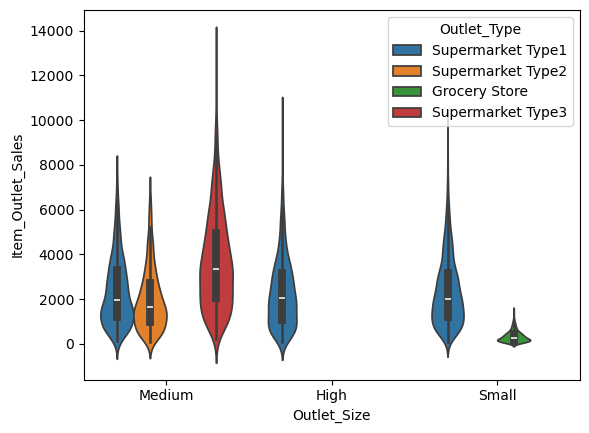

In [29]:
sns.violinplot(data=data, x="Outlet_Size", y="Item_Outlet_Sales", hue="Outlet_Type")


1. Supermarket 3 has high variance in outlet sales
2. Only Supermarket_Type 1 has high outlet size with less outlet sales compared to others
3. Grocery store has lest outlet sales and fall under small outlet size

<Axes: xlabel='Item_Type'>

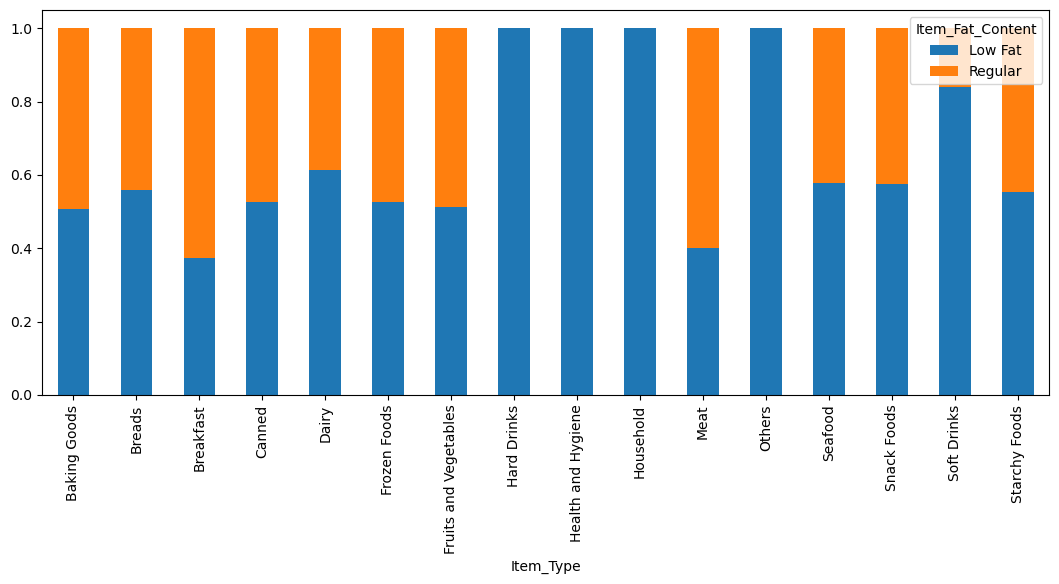

In [32]:
fig = pd.crosstab(data['Item_Type'], data['Item_Fat_Content'])
fig.div(fig.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 5))


1. There is no record for 'Hard drinks' and 'Health and Hygiene' with Regular fat
2. Breakfast and Meat has lowest % of low fat records

## Bivariate Analysis

C:\Users\Abhinav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.

C:\Users\Abhinav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.

C:\Users\Abhinav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.

C:\Users\Abhinav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.



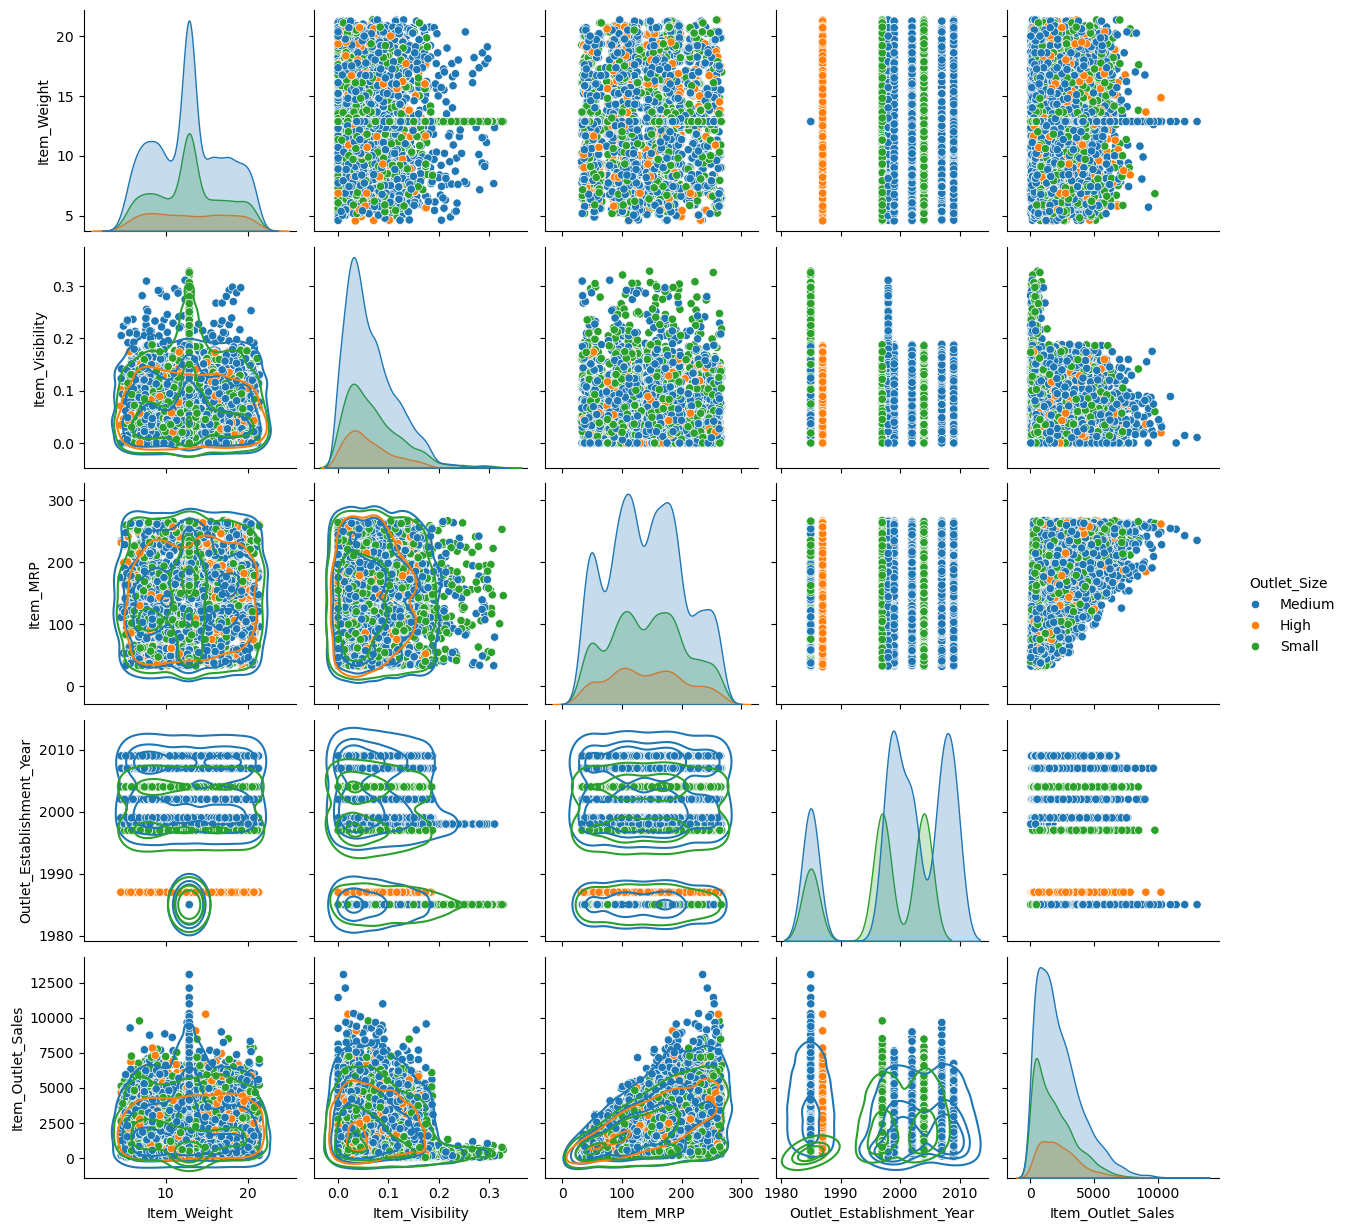

In [85]:
g = sns.pairplot(data,hue='Outlet_Size')
g.map_lower(sns.kdeplot, levels=4, color=".2")

1. High outlet size often has lower item weights and lower item visibility also has lower outlet sales
2. Some linear relationship can be seen with outlet sales with Item MRPs
3. High Outlet size was not established after 1990 or do not have items recorded in this dataset
4. Small outlet size has good item visibility for some items

### Correlation Analysis

<Axes: >

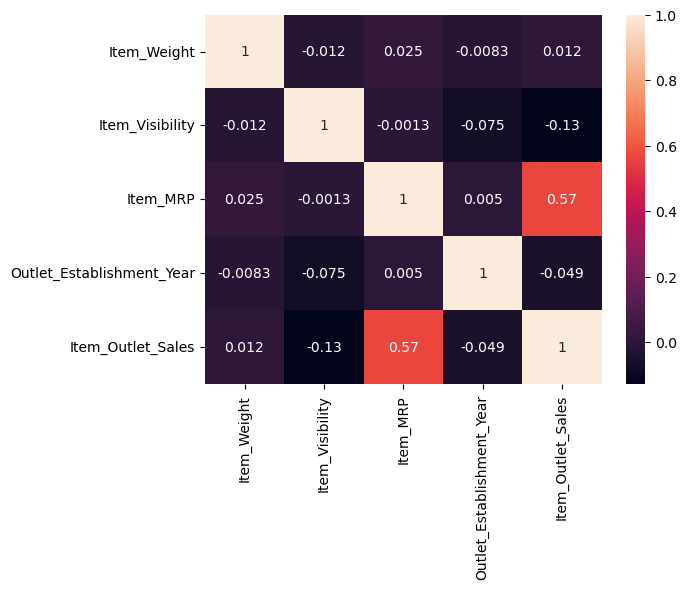

In [97]:
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True)

Only One high correlation with ItemMRP to OutletSales, but not significant enough to drop

## Data Preprocessing/Feature Engineering

In [101]:
#Checking Cardinality, 'Item Identifier' can cause some issue, rest is all good
for col in data:
    cardinality = len(pd.Index(data[col]).value_counts())
    print(data[col].name + ": " + str(cardinality))


Item_Identifier: 1559
Item_Weight: 416
Item_Fat_Content: 2
Item_Visibility: 7880
Item_Type: 16
Item_MRP: 5938
Outlet_Identifier: 10
Outlet_Establishment_Year: 9
Outlet_Size: 3
Outlet_Location_Type: 3
Outlet_Type: 4
Item_Outlet_Sales: 3493


In [103]:
#Checking null values in percentage
data.isnull().sum(axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


There are several advance method for imputation
1. KNN Imputation
2. Matrix Factorization
3. Fitting Regression models to predict missing values

For this exercise, Filling Weight with Mean and Outlet size with Mode

In [36]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_1756\4118834833.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Abhinav\AppData\Local\Temp\ipykernel_1756\4118834833.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [38]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [158]:
categorical_cols = ['Item_Fat_Content','Item_Type','Outlet_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
one_hot_df = pd.get_dummies(data, columns=categorical_cols)
#Dropping ItemIdentifier and Outlet_Identifier as it is needed in submission
dropping_columns = ['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier']
one_hot_df = one_hot_df.drop(dropping_columns,axis=1)
one_hot_df = one_hot_df.astype(float)

In [160]:
one_hot_df

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0           9.300         0.016047  249.8092          3735.1380   
1           5.920         0.019278   48.2692           443.4228   
2          17.500         0.016760  141.6180          2097.2700   
3          19.200         0.000000  182.0950           732.3800   
4           8.930         0.000000   53.8614           994.7052   
...           ...              ...       ...                ...   
8518        6.865         0.056783  214.5218          2778.3834   
8519        8.380         0.046982  108.1570           549.2850   
8520       10.600         0.035186   85.1224          1193.1136   
8521        7.210         0.145221  103.1332          1845.5976   
8522       14.800         0.044878   75.4670           765.6700   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                          1.0                       0.0   
1                          0.0                       1.0   
2                          1.0                       0.0   
3                          0.0                       1.0   
4                          1.0                       0.0   
...                        ...                       ...   
8518                       1.0                       0.0   
8519                       0.0                       1.0   
8520                       1.0                       0.0   
8521                       0.0                       1.0   
8522                       1.0                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                        0.0               0.0                  0.0   
1                        0.0               0.0                  0.0   
2                        0.0               0.0                  0.0   
3                        0.0               0.0                  0.0   
4                        0.0               0.0                  0.0   
...                      ...               ...                  ...   
8518                     0.0               0.0                  0.0   
8519                     1.0               0.0                  0.0   
8520                     0.0               0.0                  0.0   
8521                     0.0               0.0                  0.0   
8522                     0.0               0.0                  0.0   

      Item_Type_Canned  ...  Outlet_Size_High  Outlet_Size_Medium  \
0                  0.0  ...               0.0                 1.0   
1                  0.0  ...               0.0                 1.0   
2                  0.0  ...               0.0                 1.0   
3                  0.0  ...               0.0                 1.0   
4                  0.0  ...               1.0                 0.0   
...                ...  ...               ...                 ...   
8518               0.0  ...               1.0                 0.0   
8519               0.0  ...               0.0                 1.0   
8520               0.0  ...               0.0                 0.0   
8521               0.0  ...               0.0                 1.0   
8522               0.0  ...               0.0                 0.0   

      Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                   0.0                          1.0   
1                   0.0                          0.0   
2                   0.0                          1.0   
3                   0.0                          0.0   
4                   0.0                          0.0   
...                 ...                          ...   
8518                0.0                          0.0   
8519                0.0                          0.0   
8520                1.0                          0.0   
8521                0.0                          0.0   
8522                1.0                          1.0   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                             0.0                          

## Feature Scaling
Although not necessary as I plan to use bagging and boosting regressor trees on it, and it is work well without scaling data

In [401]:
y = one_hot_df['Item_Outlet_Sales']
X = one_hot_df.drop('Item_Outlet_Sales',axis=1)
features = X.columns

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.28252456, 0.04886645, 0.92750715, ..., 1.        , 0.        ,
        0.        ],
       [0.08127419, 0.05870508, 0.0720684 , ..., 0.        , 1.        ,
        0.        ],
       [0.77076511, 0.05103696, 0.46828841, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.35992855, 0.10714751, 0.22849221, ..., 1.        , 0.        ,
        0.        ],
       [0.15808276, 0.44221878, 0.30493925, ..., 0.        , 1.        ,
        0.        ],
       [0.61000298, 0.13666114, 0.18750976, ..., 1.        , 0.        ,
        0.        ]])

In [167]:
X = scaler.fit_transform(X)

### Skipping removing Outliers, as I plan to use Regressor Trees, which are robusts to outliers.

1. Outliers can be viewed by plotting Box plots, analysing quantile ranges.
2. it can be removed manually or using IQR or z-score

## Modeling

In [171]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [350]:
#Trying with Multiple Tree based models, Bagging and Boosting
dtr = DecisionTreeRegressor()
rf = ensemble.RandomForestRegressor(n_estimators=100)
ada = ensemble.AdaBoostRegressor(n_estimators=100)
gbr = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5, 
                                         min_samples_split=8, min_samples_leaf=100)
xgb = XGBRFRegressor(n_estimators=100)

In [175]:
#DCT
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

RMSE : 1530.592268616087


In [177]:
#Random Forrest
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

RMSE : 1152.8342345804435


In [179]:
#AdaBoost
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

RMSE : 1238.9155569719642


In [288]:
#GBM Forrest
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

RMSE : 1096.1881451370837


In [290]:
#XGBoost
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

RMSE : 1092.7173085245754


## Hyperparameter Tuning on GBM!

In [186]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Depth of individual trees
    'subsample': [0.8, 1.0],  # Fraction of samples for training
}
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)
# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Score: -1172418.8278766528


## ## Hyperparameter Tuning on RF!

In [296]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)
# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: -1240724.7529845617


## Final Model After GridSearch

In [193]:
#GBM Forrest
gbr = ensemble.GradientBoostingRegressor(learning_rate=0.01,max_depth=3,n_estimators=300,subsample=0.8)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

RMSE : 1091.4653574750598


In [354]:
#Random Forrest
rf = ensemble.RandomForestRegressor(**grid_search.best_params_)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

RMSE : 1110.8306523759036


## Feature Importance

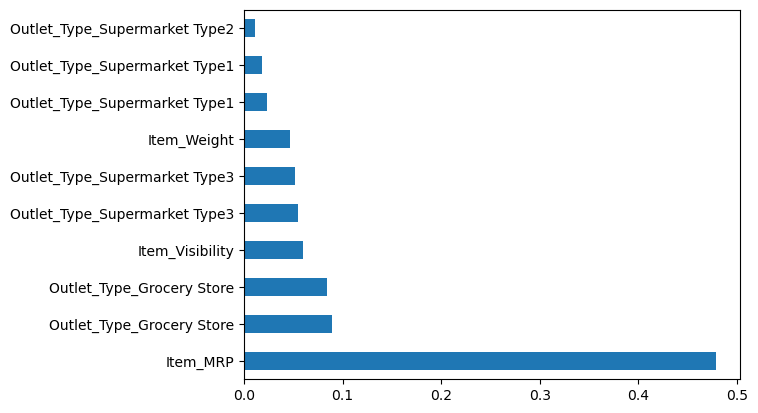

In [407]:
# visualizing feature importances
from sklearn.ensemble import ExtraTreesRegressor
# To look at the best features
feat_importances = pd.Series(rf.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Preparing Test Set

In [357]:
test = test.drop('Item_Outlet_Sales',axis=1)

In [359]:
test['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
test['Item_Fat_Content'].replace(['reg'],'Regular',inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace = True)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_1756\2001224400.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Abhinav\AppData\Local\Temp\ipykernel_1756\2001224400.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [362]:
one_hot_test = pd.get_dummies(test, columns=categorical_cols)
dropping_columns = ['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier']
one_hot_test = one_hot_test.drop(dropping_columns,axis=1)
one_hot_test = one_hot_test.astype(float)

In [364]:
test_scaler.shape

(5681, 35)

In [366]:
x_train.shape

(6818, 35)

In [368]:
test_scaler = scaler.fit_transform(one_hot_test)

In [373]:
preds_submission = rf.predict(test_scaler)

In [375]:
test_submission = test

In [377]:
test_submission['Item_Outlet_Sales'] = preds_submission

In [379]:
test_submission[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv('Abhinav Submission.csv',index=False)